<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">Brief - Les modèles dans tous leurs états </h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">hand-written digits</h2>
</div>

La problématique étudiée est le cas avec le dataset hand-written digits. <br>
L'objectif de ce cas est de reconnaître les chiffres de 1 à 10 à partir des images fournies dans le dataset. </h3>

Il s'agit donc d'un cas de machine learning supervisé, et plus spécifiquement d'un cas de classification.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1 - Import des librairies et du dataset</h3>
</div>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
import collections

In [2]:
# Import the hand-written digits dataset
digits = datasets.load_digits() 

In [3]:
# visualising data
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Nous remarquons ci-dessus que les images sont représentées sous forme de matrice.

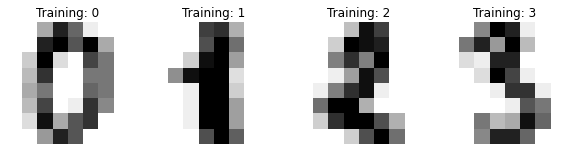

In [4]:
# Plot some data to show what they look like
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [5]:
X,y = digits.data, digits.target

In [6]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Print data shape to understand with what we work
print("Taille avant vectorisation : {}\nTaille après vectorisation : {}".format(digits.images.shape, data.shape))

Taille avant vectorisation : (1797, 8, 8)
Taille après vectorisation : (1797, 64)


Nous allons séparer notre dataset en 2 parties. Une partie pour l'entrainement du modele et l'autre pour le test. Nous faisons cela car il faut test notre modele sur de nouvelles données.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2 - Phase d'entrainement et de prediction</h3>
</div>

Il existe differentes méthodes pour notre modele, nous allons donc toutes les utilisées afin de déterminer qu'elle modèle est la méthode la plus adaptée 

In [11]:
svclassifier = SVC(kernel=kernels)
svclassifier.fit(X_test,y_test)
pred = svclassifier.predict(X_test)
for kernels in ("linear", "poly", "rbf"):
    print("représentaion du kernel",kernels,":")
    print("_"*55)
    print(classification_report(y_test,pred))
    print("_"*55)

représentaion du kernel linear :
_______________________________________________________
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      1.00      0.99        37
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        36
           8       1.00      0.97      0.98        33
           9       1.00      0.97      0.99        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

_______________________________________________________
représentaion du kernel poly :
_______________________________________________________
         

### Petite remarque 

Sur la méthode "rbf", nous pouvons voir que certains paramètres ne sont pas parfait

In [12]:
# display prediction
print(svclassifier.predict(digits.data[[7]]))

[7]


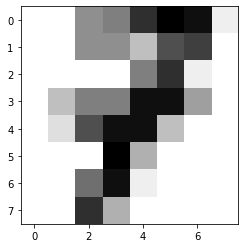

In [14]:
# plot prediction
plt.imshow(digits.images[7], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()